In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras

In [49]:
train_dir="sign_data_ver1/train/"
test_dir="sign_data_ver1/test/"

In [50]:
size = 224
        

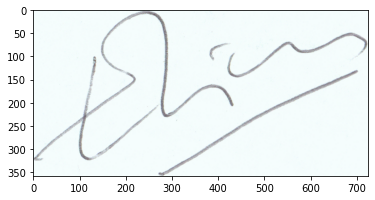

In [51]:
import matplotlib.pyplot as plt
img = plt.imread('sign_data_ver1/train/001/001_01.PNG')
plt.imshow(img)

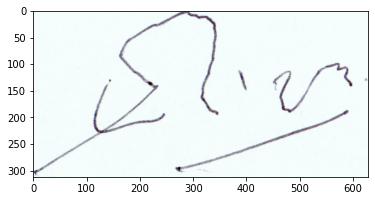

In [52]:
img1 = plt.imread('sign_data_ver1/train/001_forg/0119001_01.png')
plt.imshow(img1)

In [53]:
import cv2
import os
import glob

train_data = []
train_labels = []

for per in os.listdir('sign_data_ver1/train/'):

    for data in glob.glob('sign_data_ver1/train/'+per+'/*.*'):
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (size, size))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

#Test Data

test_data = []
test_labels = []

for per in os.listdir('sign_data_ver1/test/'):
    for data in glob.glob('sign_data_ver1/test/'+per+'/*.*'):
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (size, size))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(1)
        else:
            test_labels.append(0)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [54]:
# from keras.utils import to_categorical
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

In [55]:
# train_labels

In [56]:
# test_labels

In [57]:
train_data.shape

(1649, 1, 224, 224, 3)

In [58]:
test_data.shape

(500, 1, 224, 224, 3)

In [59]:
train_data = train_data.reshape(-1, size,size, 3)
test_data = test_data.reshape(-1, size,size, 3)

# train_data = np.asarray(train_labels).astype('float32').reshape((-1,1))
# test_data = np.asarray(test_labels).astype('float32').reshape((-1,1))

In [60]:
train_data.shape

(1649, 224, 224, 3)

In [61]:
test_data.shape

(500, 224, 224, 3)

In [62]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)
test_data,test_labels = shuffle(test_data,test_labels)

In [65]:

base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet',
                                               classifier_activation='softmax'
                                               )
base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(1)

network = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.001
network.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
network.summary()
              

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [66]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]

EPOCHS = 10
BS = 1
progess = network.fit(train_data, train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.01)

Epoch 1/10
1632/1632 [==============================] - 67s 39ms/step - loss: 0.3819 - accuracy: 0.8260 - val_loss: 0.1813 - val_accuracy: 0.9412
Epoch 2/10
1632/1632 [==============================] - 68s 42ms/step - loss: 0.2074 - accuracy: 0.9154 - val_loss: 0.1384 - val_accuracy: 0.9412
Epoch 3/10
1632/1632 [==============================] - 64s 39ms/step - loss: 0.1739 - accuracy: 0.9259 - val_loss: 0.1264 - val_accuracy: 0.9412
Epoch 4/10
1632/1632 [==============================] - 67s 41ms/step - loss: 0.1502 - accuracy: 0.9424 - val_loss: 0.1540 - val_accuracy: 0.8824
Epoch 5/10
1632/1632 [==============================] - 71s 44ms/step - loss: 0.1412 - accuracy: 0.9473 - val_loss: 0.0522 - val_accuracy: 1.0000
Epoch 6/10
1632/1632 [==============================] - 72s 44ms/step - loss: 0.1285 - accuracy: 0.9491 - val_loss: 0.0545 - val_accuracy: 1.0000
Epoch 7/10
1632/1632 [==============================] - 70s 43ms/step - loss: 0.1259 - accuracy: 0.9547 - val_loss: 0.0476 -

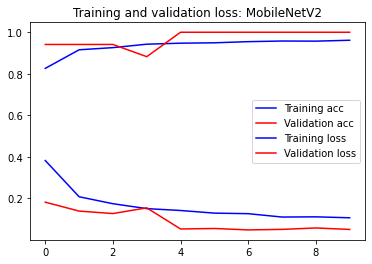

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [67]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss: MobileNetV2')
plt.legend()
 
plt.show()
 
plt.figure()

In [99]:
predict = network.predict(test_data)

16/16 [==============================] - 12s 723ms/step


In [105]:
from keras.applications.mobilenet_v2 import decode_predictions

# predict #prob of genuine, prob of forged
predict

array([[ 6.37929678e+00],
       [ 7.41910315e+00],
       [ 1.30000820e+01],
       [-4.62932491e+00],
       [ 1.16337318e+01],
       [ 9.70704460e+00],
       [ 7.53098154e+00],
       [ 3.29289794e+00],
       [ 7.65420961e+00],
       [-4.71777153e+00],
       [-7.30395734e-01],
       [-2.42943263e+00],
       [-5.34830713e+00],
       [ 1.11433535e+01],
       [-7.15158343e-01],
       [ 7.12936068e+00],
       [-1.04163952e+01],
       [ 7.96849203e+00],
       [ 7.29690695e+00],
       [ 4.94463873e+00],
       [-1.06558266e+01],
       [ 1.20171490e+01],
       [ 6.85580969e+00],
       [ 5.88394499e+00],
       [ 6.42101622e+00],
       [ 4.55561495e+00],
       [-4.21701622e+00],
       [ 9.89917374e+00],
       [ 2.16506481e+01],
       [ 1.24906883e+01],
       [ 1.18066196e+01],
       [-6.64347792e+00],
       [ 1.18705263e+01],
       [ 6.70674992e+00],
       [ 9.66322517e+00],
       [ 2.97065616e+00],
       [ 6.52395391e+00],
       [ 7.19304991e+00],
       [-1.2

In [70]:
test_loss, test_acc = network.evaluate(test_data, test_labels, verbose=1) 
print("Test Accuracy:", test_acc)

16/16 [==============================] - 16s 917ms/step - loss: 0.1297 - accuracy: 0.9620
Test Accuracy: 0.9620000123977661


In [71]:
# network_json = network.to_json()
# with open ("ver1_mobilenetv2.json", "w") as json_file:
#     json_file.write(network_json)
# network.save_weights("ver1_mobilenetv2.h5")  #saving the model

network.save("ver1_mobilenetv2.h5")